### QED-C Application-Oriented Benchmarks - Qiskit Version
The notebook contains a suite of application-oriented benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=2
max_qubits=10
skip_qubits=1
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":"cpu" }

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


In [4]:
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

# Configure module paths
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

import execute
execute.verbose = False
execute.verbose_time = False

import hamlib_utils
hamlib_utils.verbose = False

import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False


### Hamiltonian Simulation - Method 1 

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 04, 2025 07:10:18 UTC
************
Executing [1] circuits with num_qubits = 2
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-2_h-2
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 22, 0.385
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 22, 0.385, 10.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.015, 0.031, 0.009 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 0.998

************
Executing [1] circuits with num_qubits = 3
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-3_h-2
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 52, 0.484
Average Normalized Transpiled Depth

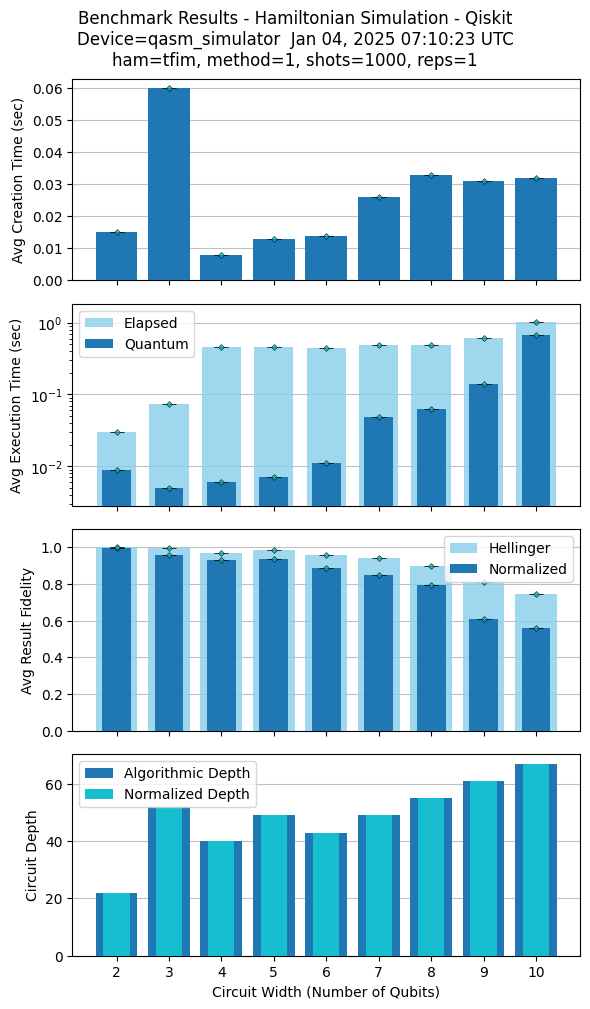

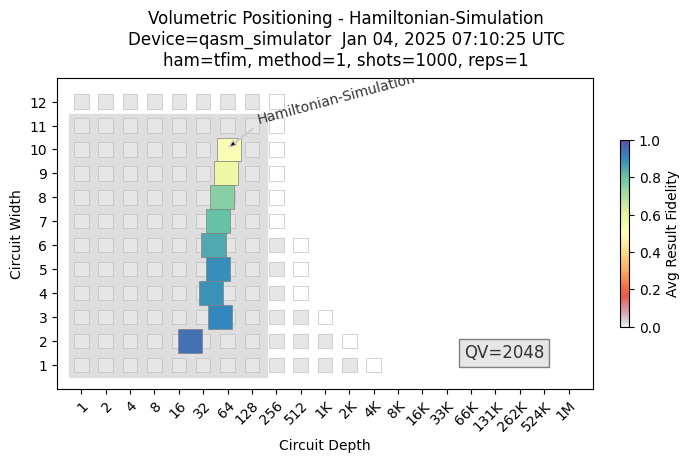

In [5]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Method 2 

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 04, 2025 07:10:30 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 664, 0.333
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 404, 0.443, 240.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.062, 0.131, 0.028 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.595, 0.273

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 1280, 0.333
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 792, 0.443, 480.0
Avera

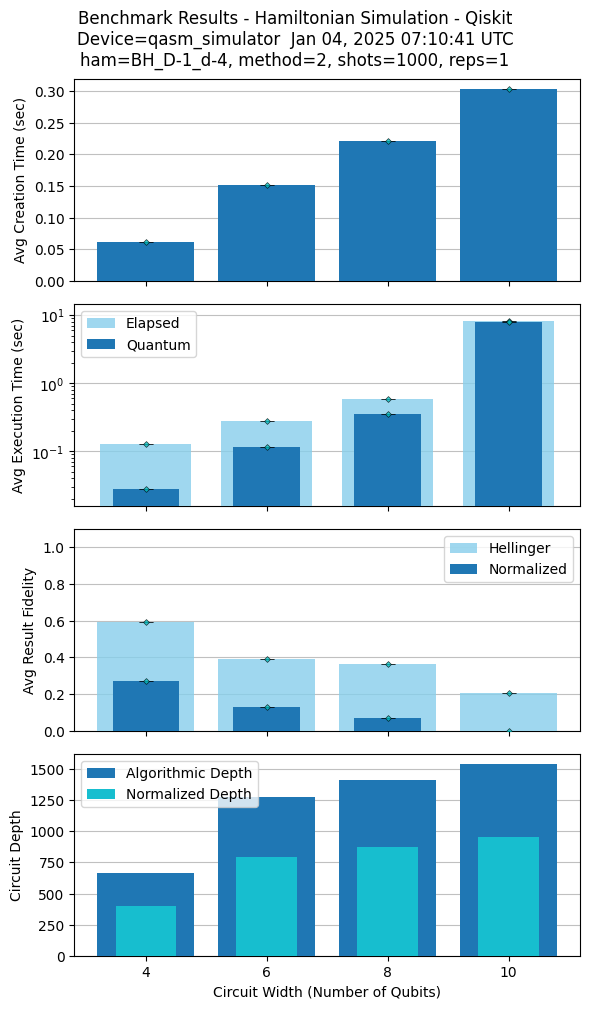

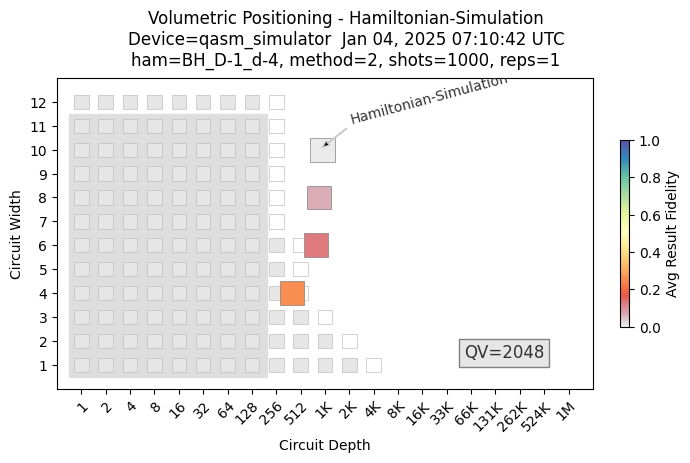

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=2, hamiltonian = hamiltonian_name,
    hamiltonian_params = hamiltonian_params,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hamiltonian Simulation - Method 3

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 04, 2025 07:10:46 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 286, 0.663
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 266, 0.641, 200.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.025, 0.067, 0.021 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.698, 0.673

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 358, 0.676
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 318, 0.648, 300.0
Average Creation, Elapsed, Execution Time for the 5 qubit group 

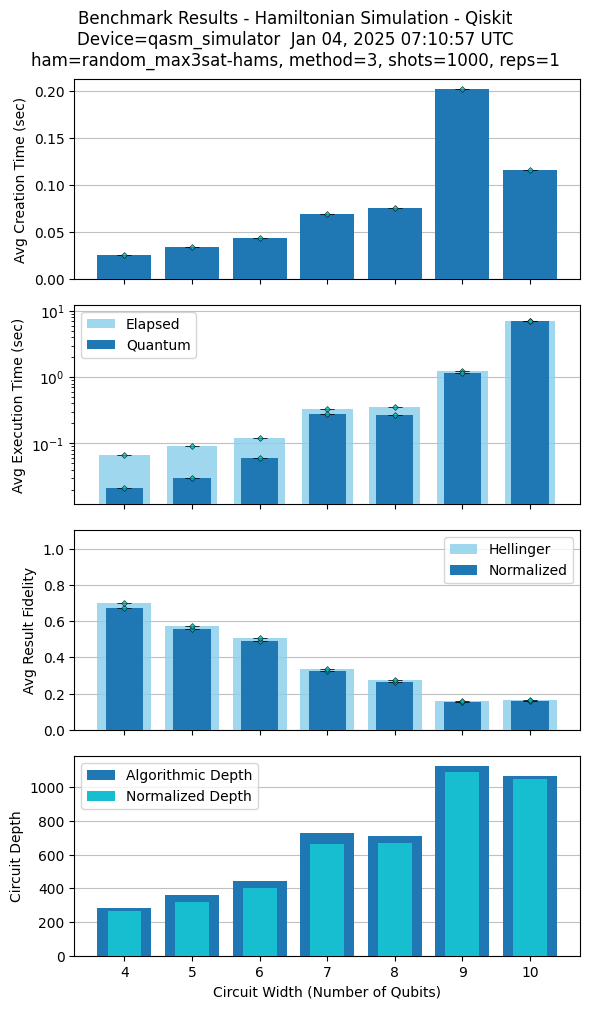

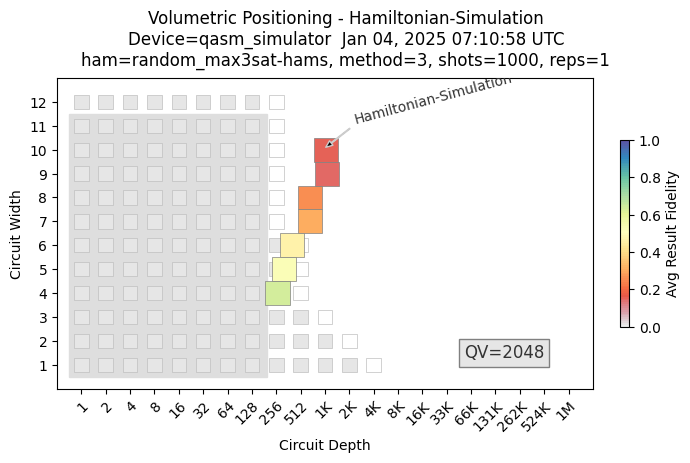

In [7]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=3, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                do_sqrt_fidelity = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Method 3

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 04, 2025 07:11:00 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 674, 0.535
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 466, 0.588, 320.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.048, 0.14, 0.046 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.587, 0.549

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 5266, 0.41
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 3670, 0.567, 2760.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.444, 1.211, 0.552 secs
Average Tran

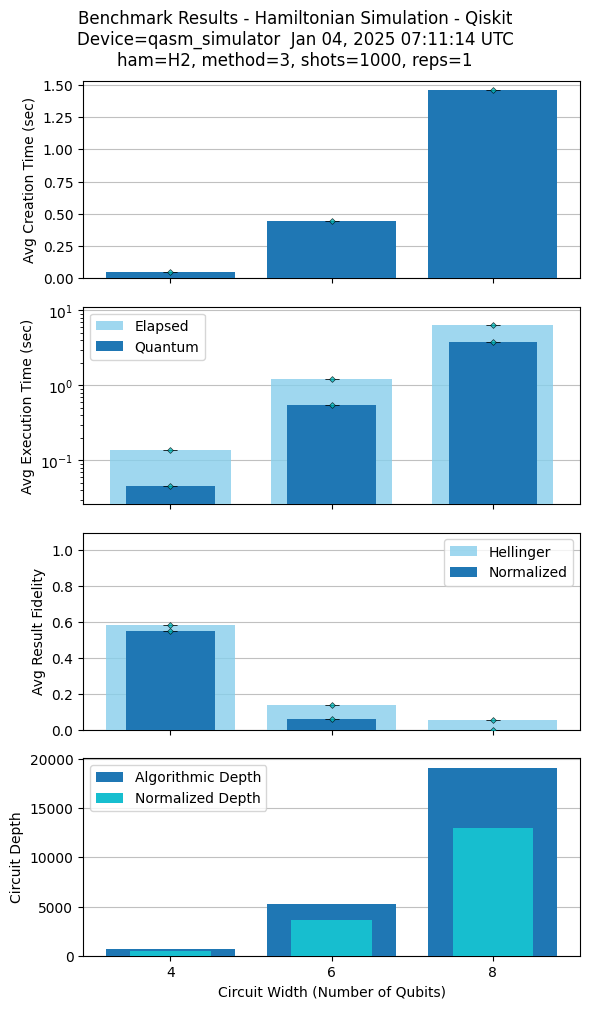

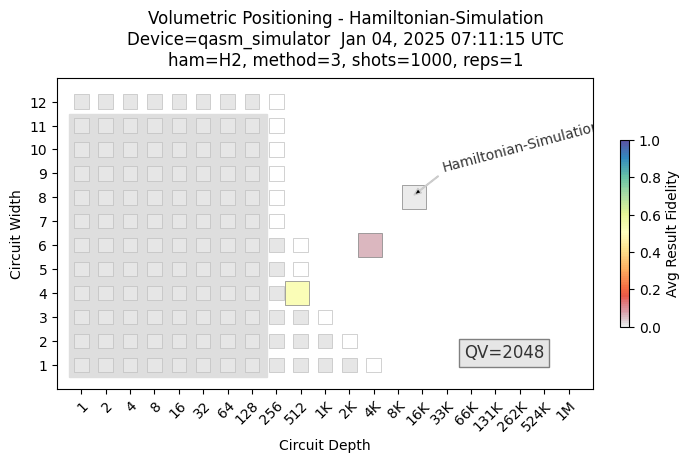

In [8]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=3, hamiltonian = hamiltonian_name,
                hamiltonian_params = hamiltonian_params,
                do_sqrt_fidelity = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Combined Benchmark Results

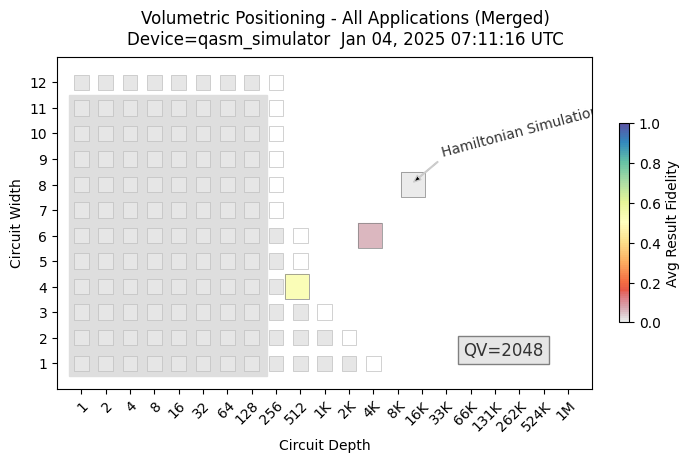

In [9]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)

In [10]:
import qiskit
print(qiskit.__version__)

1.2.1
